In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle

Załadowanie danych z pliku:

In [2]:
genres_df = pd.read_csv('../data/genres.csv')
tracks_df = pd.read_csv('../data/tracks_normalized.csv')

In [3]:
genres_df.set_index("id", inplace=True)
genres_df

,pop,rock,folk,jazz,latin,adult standards,hip hop,soul,mellow gold,indie,...,song,regional mexican,pagoda,soundtrack,opm,bossa nova,house,cumbia,trap,other
id,,,,,,,,,,,,,,,,,,,,,
6J8qcTesEfzpGhZjBa6kfV,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2HHnW1zEozzxU9spZVGO5I,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7yhvflcXyqw1pQgCSnelZ4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4uqs4He9JdU4ztAQtsgmyF,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4LtSTc3xANVhYeeN69nscM,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iwS6O8EY7DarEZ2oAeRwP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1zQ0ToYJQtoouipDhNV2kC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3Y70uXC9a7J2JKiJnVNk0t,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tracks_df.set_index("id", inplace=True)
tracks_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
id,,,,,,,,,,,,,,,
6C0WWu7RYKbAgWUI3YC0sT,0.602103,0.195690,1,1.020711,0.6630,-0.346023,1.087743,1.090398,-1.005248,-0.372528,-0.511192,0.277558,-0.731889,0.257825,0.699478
4q7EBRq8ncztC2PRmEC7Fy,0.251110,0.242868,0,-0.760388,0.3480,-0.062158,-0.661805,-0.380383,0.710347,-0.356380,3.978009,-1.104803,-0.096889,0.257825,-0.694689
7cNyONpVADZVrW9xe3qq4z,0.894598,0.467916,0,-1.836600,0.8990,0.221708,1.018522,-0.273483,-1.238592,-0.372503,-0.462921,-1.037467,1.360271,-2.008070,0.550103
1bKRTzTFz7wHMxpgZSuPR1,-1.386859,-0.315097,0,0.397641,0.0616,-1.481486,-3.369613,-0.238050,1.091656,-0.372491,-0.226930,-0.882992,-1.165558,0.257825,-1.441564
56OEjuyZ3AROnv4aR1XqhD,-0.626373,-0.421038,0,-1.333109,0.0663,0.789439,-3.356786,-0.305914,1.609999,-0.370602,0.143148,-0.974093,-0.658469,0.257825,-0.993439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6I2q7ZIY7QX3sWOmuJjhph,-0.275380,0.468647,0,0.806728,0.9300,1.641035,0.774147,-0.352157,-1.004652,-0.337684,-0.307381,0.721180,0.688898,0.257825,0.301145
2XvrMHbSO077Ajg7QTTNdY,1.655083,0.153513,0,0.196245,0.5570,-1.481486,0.737657,-0.393596,-1.163432,-0.372457,-0.659223,-0.985975,0.150700,0.257825,0.848853
4yFeqGWRt2Z10E2ECWG5I2,-0.684872,0.166066,0,-1.125419,0.4920,-0.913755,-0.339363,-0.364769,0.573314,-0.372528,0.475681,0.336971,1.623314,0.257825,-0.097189


### Model podstawowy
Model podstawowy będzie trenowany do przewidywania tylko jednego gatunku. Każda piosenka będzie miała przypisany najpopularniejszy ze swoich gatunków. 

In [5]:
genres_popularity = genres_df.sum().sort_values(ascending=False)
genres_popularity

pop                  59285
rock                 40125
folk                 10461
jazz                  9934
latin                 7965
adult standards       6728
hip hop               6096
soul                  5898
mellow gold           5490
indie                 5287
country               5220
wave                  5200
metal                 4671
blues                 4597
hoerspiel             3901
rap                   3751
regional mexican      3626
punk                  3538
singer-songwriter     3504
funk                  3390
dance                 3326
children              2888
movie                 2551
cumbia                2102
mpb                   1880
soundtrack            1816
tango                 1451
opm                   1045
other                  925
samba                  874
house                  612
folklore               581
worship                523
song                   475
pagoda                 468
trap                   431
ranchera               429
b

In [6]:
genres_dict = genres_df.apply(lambda row: row[row == 1].index.tolist(), axis=1).to_dict()
genres_list_df = pd.DataFrame(list(genres_dict.items()), columns=["id", "genres"])
genres_list_df

,id,genres
0,6J8qcTesEfzpGhZjBa6kfV,"[pop, rock, folk]"
1,2HHnW1zEozzxU9spZVGO5I,"[pop, rock, folk]"
2,7yhvflcXyqw1pQgCSnelZ4,"[pop, rock, folk]"
3,4uqs4He9JdU4ztAQtsgmyF,"[pop, rock, folk]"
4,4LtSTc3xANVhYeeN69nscM,"[pop, rock, indie]"
...,...,...
129643,7iwS6O8EY7DarEZ2oAeRwP,[mpb]
129644,1zQ0ToYJQtoouipDhNV2kC,[pop]
129645,3Y70uXC9a7J2JKiJnVNk0t,[pop]
129646,4ugBZbG4149EQpwkDhhm8k,[indie]


In [7]:
def find_most_popular_genre(row):
    def popularity(genre):
        return genres_popularity[genre]
    return max(row, key=popularity)

genres_list_df.loc[genres_list_df.index, "genres"] = genres_list_df["genres"].apply(find_most_popular_genre)
genres_list_df

,id,genres
0,6J8qcTesEfzpGhZjBa6kfV,pop
1,2HHnW1zEozzxU9spZVGO5I,pop
2,7yhvflcXyqw1pQgCSnelZ4,pop
3,4uqs4He9JdU4ztAQtsgmyF,pop
4,4LtSTc3xANVhYeeN69nscM,pop
...,...,...
129643,7iwS6O8EY7DarEZ2oAeRwP,mpb
129644,1zQ0ToYJQtoouipDhNV2kC,pop
129645,3Y70uXC9a7J2JKiJnVNk0t,pop
129646,4ugBZbG4149EQpwkDhhm8k,indie


In [8]:
tracks_df = pd.merge(tracks_df, genres_list_df, left_on=tracks_df.index, right_on="id")
tracks_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,id,genres
0,0.602103,0.195690,1,1.020711,0.6630,-0.346023,1.087743,1.090398,-1.005248,-0.372528,-0.511192,0.277558,-0.731889,0.257825,0.699478,6C0WWu7RYKbAgWUI3YC0sT,pop
1,0.251110,0.242868,0,-0.760388,0.3480,-0.062158,-0.661805,-0.380383,0.710347,-0.356380,3.978009,-1.104803,-0.096889,0.257825,-0.694689,4q7EBRq8ncztC2PRmEC7Fy,rock
2,0.894598,0.467916,0,-1.836600,0.8990,0.221708,1.018522,-0.273483,-1.238592,-0.372503,-0.462921,-1.037467,1.360271,-2.008070,0.550103,7cNyONpVADZVrW9xe3qq4z,latin
3,-1.386859,-0.315097,0,0.397641,0.0616,-1.481486,-3.369613,-0.238050,1.091656,-0.372491,-0.226930,-0.882992,-1.165558,0.257825,-1.441564,1bKRTzTFz7wHMxpgZSuPR1,jazz
4,-0.626373,-0.421038,0,-1.333109,0.0663,0.789439,-3.356786,-0.305914,1.609999,-0.370602,0.143148,-0.974093,-0.658469,0.257825,-0.993439,56OEjuyZ3AROnv4aR1XqhD,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,-0.275380,0.468647,0,0.806728,0.9300,1.641035,0.774147,-0.352157,-1.004652,-0.337684,-0.307381,0.721180,0.688898,0.257825,0.301145,6I2q7ZIY7QX3sWOmuJjhph,pop
129644,1.655083,0.153513,0,0.196245,0.5570,-1.481486,0.737657,-0.393596,-1.163432,-0.372457,-0.659223,-0.985975,0.150700,0.257825,0.848853,2XvrMHbSO077Ajg7QTTNdY,rock
129645,-0.684872,0.166066,0,-1.125419,0.4920,-0.913755,-0.339363,-0.364769,0.573314,-0.372528,0.475681,0.336971,1.623314,0.257825,-0.097189,4yFeqGWRt2Z10E2ECWG5I2,pop
129646,-0.450877,0.872643,0,-0.590460,0.7650,-0.629889,1.178859,-0.379182,-1.044869,-0.018474,-0.462921,-0.831500,0.437969,0.257825,-0.097189,7dJgMpT6LzQTlLMEuoapq2,rock


Każdy gatunek zostanie zakodowany przez liczbę:

In [9]:
le = LabelEncoder()
tracks_df['genre_encoded'] = le.fit_transform(tracks_df['genres'])

with open('./artifacts/encoders/le_genre.pkl', 'wb') as f:
    pickle.dump(le, f)


Przygotowane zostaną zbiory atrybutów i etykiet.

In [10]:
X = tracks_df.drop(columns=['id', 'genres', 'genre_encoded'])
y = tracks_df['genre_encoded']

Aby móc ocenić jakość uzyskanego modelu, dane trzeba podzielić na treningowe i testowe.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naszym modelem bazowym będzie las losowy.

#### Poszukiwanie hiperparametrów
Użyty zostanie randomized search w celu odnalezienia optymalnych wartości dla hiperparametrów lasu losowego.

In [12]:
n_estimators = [int(x) for x in np.linspace(1, 500, 5)]
max_depth = [int(x) for x in np.linspace(1, 50, 5)]
max_features = ['sqrt', 'log2']
bootstrap = [True, False]

random_search = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_features,
                'bootstrap': bootstrap}

rf = RandomForestClassifier()

search_params = RandomizedSearchCV(estimator=rf, param_distributions=random_search, n_iter=10, cv=5, random_state=42)
search_params.fit(X_train, y_train)
best_params = search_params.best_params_
best_params

{'n_estimators': 375,
 'max_features': 'sqrt',
 'max_depth': 37,
 'bootstrap': False}

Na podstawie znalezionych najlepszych hiperparametrów tworzone są predykcje.

In [13]:
params = search_params.best_params_
base_model = RandomForestClassifier(**params)
base_model.fit(X_train, y_train)
base_predictions = base_model.predict(X_test)

print("\nAdvanced Model (Random Forest Classifier) Results:")
print(classification_report(y_test, base_predictions, zero_division=0))
print("Accuracy:", accuracy_score(y_test, base_predictions))



Advanced Model (Random Forest Classifier) Results:
              precision    recall  f1-score   support

           0       0.75      0.11      0.20       291
           1       1.00      0.07      0.12        60
           2       0.83      0.06      0.11        82
           3       0.70      0.21      0.32       545
           4       0.83      0.06      0.11       168
           5       0.88      0.03      0.07       406
           6       1.00      0.07      0.13       116
           7       0.90      0.11      0.19       481
           8       0.64      0.08      0.14       115
           9       1.00      0.06      0.12        49
          10       0.51      0.32      0.40       515
          11       0.96      0.98      0.97       782
          12       0.67      0.48      0.56       143
          13       0.00      0.00      0.00       129
          14       0.60      0.57      0.58      1463
          15       0.97      0.11      0.21       287
          16       0.00      

Macierz pomyłek:

In [14]:
conf_matrix = confusion_matrix(y_test, base_predictions)

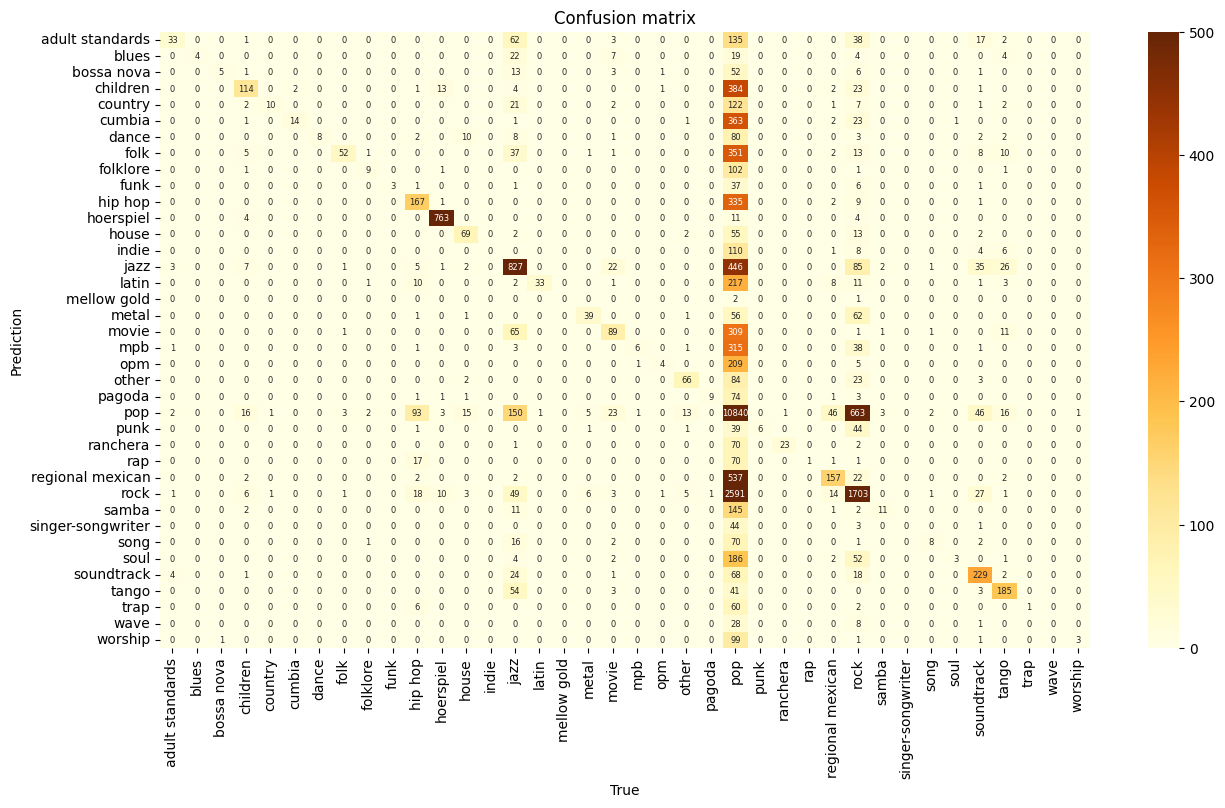

In [15]:
genre_names = tracks_df.groupby("genre_encoded")["genres"].first()

plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, vmax=500, fmt="d", cmap="YlOrBr", xticklabels=genre_names, yticklabels=genre_names, annot_kws={'fontsize': 6})
plt.xlabel("True")
plt.ylabel("Prediction")
plt.title("Confusion matrix")
plt.show()

Na grafie wartość *vmax* została ustalona na 500, z racji znacząco przeważającej ilości piosenek z gatunku *pop* - dzięki takiemu ustaleniu lepiej widać różnice między wartościami. Model w wielu przypadkach niepoprawnie oznacza piosenki o gatunku pop. Może to wynikać ze sposobu agregowania gatunków - takie gatunki jak *dream pop* i *rock pop* zostały połączone do jednej kategorii *pop*, mimo dużych różnic w brzmieniu. Dodatkowo widać częste pomyłki między rockiem a popem - prawdopodobnie jest to spowodowane tym, że wielu artystów w kategorii *rock* miało również przypisany gatunek *pop*.

Model zostanie zapisany do pliku - będzie później wykorzystany przez mikroserwis do tworzenia predykcji.

In [17]:
joblib.dump(base_model, './artifacts/models/base_model.pkl')

['./artifacts/models/base_model.pkl']

### Model docelowy
Model docelowy będzie uczony na listach gatunków. Jego przewidywaniami będą wektory binarne - podobnie jak jest to zaprezentowane w tabeli *genres_df*, "jedynka" będzie oznaczała przynależność do danego gatunku. W tym celu będzie stosował sieć neuronową.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
y = genres_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Do sieci neuronowej dodajemy regularyzację L2, która dodaje karę proporcjonalną do sumy wag w sieci, oraz warstwy *Dropout*. Będą one "zerowały" pewien procent neuronów podczas trenowania. Dzięki temu unikniemy nadmiernego dopasowania.

In [20]:
advanced_model = Sequential()
advanced_model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
advanced_model.add(Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)))
advanced_model.add(Dropout(0.2))
advanced_model.add(Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)))
advanced_model.add(Dropout(0.2))
advanced_model.add(Dense(units=38, activation='sigmoid'))

Dodajemy warunek wczesnego stopu - jeśli przez 5 epok wartość funkcji straty dla zbioru walidacyjnego pozostanie bez zmiany, trenowanie kończy się

In [21]:
advanced_model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [22]:
advanced_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
1621/1621 [==============================] - 1s 536us/step - loss: 0.5354 - accuracy: 0.1575 - val_loss: 0.2657 - val_accuracy: 0.4529
Epoch 2/50
1621/1621 [==============================] - 1s 508us/step - loss: 0.2680 - accuracy: 0.3857 - val_loss: 0.2456 - val_accuracy: 0.4587
Epoch 3/50
1621/1621 [==============================] - 1s 489us/step - loss: 0.2544 - accuracy: 0.4015 - val_loss: 0.2376 - val_accuracy: 0.4587
Epoch 4/50
1621/1621 [==============================] - 1s 492us/step - loss: 0.2459 - accuracy: 0.4143 - val_loss: 0.2310 - val_accuracy: 0.4587
Epoch 5/50
1621/1621 [==============================] - 1s 500us/step - loss: 0.2385 - accuracy: 0.4257 - val_loss: 0.2251 - val_accuracy: 0.4587
Epoch 6/50
1621/1621 [==============================] - 1s 493us/step - loss: 0.2322 - accuracy: 0.4306 - val_loss: 0.2197 - val_accuracy: 0.4587
Epoch 7/50
1621/1621 [==============================] - 1s 520us/step - loss: 0.2262 - accuracy: 0.4360 - val_loss: 0.2147 -

Dane z trenowania modelu:

In [25]:
history_data = advanced_model.history.history
loss = history_data['loss']
val_loss = history_data['val_loss']
acc = history_data['accuracy']
val_acc = history_data['val_accuracy']

Na ich podstawie zostaną sporządzone wykresy:

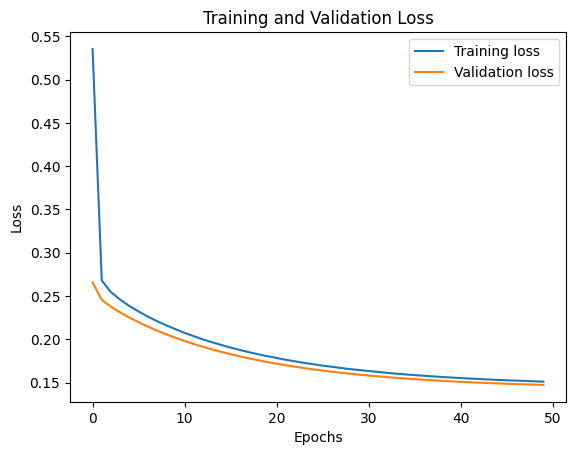

In [26]:
epochs = range(len(loss))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

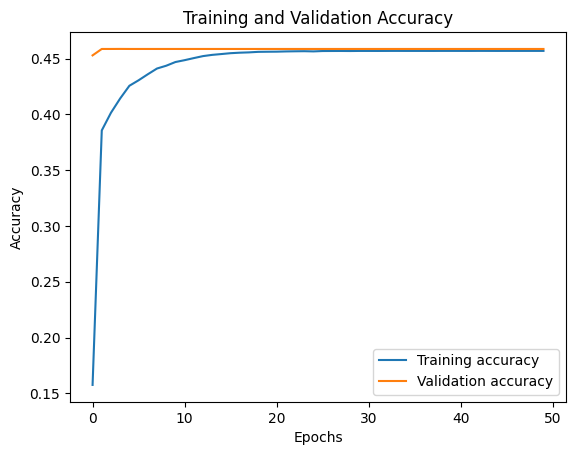

In [27]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Widać słabe efekty trenowania sieci. Zbiór danych okazał się niewystarczający do stworzenia modelu o skuteczności zadeklarowanej przez nas podczas definiowania kryteriów sukcesu (90%). Naszym błędem było podanie tej liczby w oparciu o optymistyczne założenia, zamiast odpowiednio przeprowadzonej analizy.

Model zostanie zapisany do pliku.

In [29]:
advanced_model.save('artifacts/models/advanced_model.keras')